In [86]:
# install tensorflow
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
# importing the libraries
import tensorflow as tf
print(tf.__version__)

2.12.0


In [88]:
# import some basic nessecary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [89]:
dataset = pd.read_csv('Churn_Modelling.csv')
print(data.head())
print(data.shape)
print(data.size)

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [90]:
## Divide the dataset into dependent and independent variables
X = dataset.iloc[:, 3 : 13]
y = dataset.iloc[:, 13]

print(X.head())
print(y.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  
0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [91]:
# Feature Scaling
geography = pd.get_dummies(X['Geography'], drop_first=True).head()
gender = pd.get_dummies(X['Gender'], drop_first=True).head()

In [92]:
## Concatenate the dummy variables to X
X = X.drop(['Geography', 'Gender'], axis=1)
X = pd.concat([X, geography, gender], axis=1)
print(X.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary Germany  Spain   Male  
0               1        101348.88   False  False  False  
1               1        112542.58   False   True  False  
2               0        113931.57   False  False  False  
3               0         93826.63   False  False  False  
4               1         79084.10   False   True  False  


In [93]:
# Splitting into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=42
)

In [94]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [95]:
X_train


array([[ 0.35649971, -0.6557859 ,  0.34567966, ...,         nan,
                nan,         nan],
       [-0.20389777,  0.29493847, -0.3483691 , ...,         nan,
                nan,         nan],
       [-0.96147213, -1.41636539, -0.69539349, ...,         nan,
                nan,         nan],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ...,         nan,
                nan,         nan],
       [ 0.15932282,  0.3900109 ,  1.03972843, ...,         nan,
                nan,         nan],
       [ 0.47065475,  1.15059039, -1.38944225, ...,         nan,
                nan,         nan]])

In [96]:
## Part 2 Now lets Create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import LeakyReLU, ReLU, PReLU, ELU, Softmax 
from tensorflow.keras.layers import Dropout

In [97]:
# Initialize the ANN
classifier = Sequential()

In [98]:
classifier.add(Input(shape = (X_train.shape[1],)))

In [99]:
# Adding the input layer
classifier.add(
    Dense(
        units=11,
        activation='relu',
        kernel_initializer='he_uniform',
        bias_initializer='zeros',
    )
)


In [100]:
## Adding the input layer and the first hidden layer
classifier.add(
    Dense(
        units=11,
        activation = 'relu',
        kernel_initializer='he_uniform',
        bias_initializer = 'zeros',
        kernel_regularizer = tf.keras.regularizers.l2(0.001),
        use_bias=True,
    )
)

In [ ]:
## Adding the Second hidden layer
classifier.add(
    Dense(
        units = 64,
        activation = 'relu',
        kernel_initializer='he_uniform',
        kernel_regularizer = tf.keras.regularizers.l2(0.001),
        use_bias = True
    )
)

In [103]:
# Adding the Third Hidden layer
classifier.add(
    Dense(
        units=32,
        activation='relu',
        kernel_initializer='he_normal',
        kernel_regularizer=tf.keras.regularizers.l2(0.001),
        kernel_constraint=tf.keras.constraints.MaxNorm(3.0)
    )
)


In [104]:
# Adding the output layes:
classifier.add(
    Dense(
        units=1,
        activation = 'sigmoid'
    )
)


In [105]:
# Train the Model:
classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC()
    ]
)


In [106]:
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate = 0.0001)

In [108]:
## Early stopping
import tensorflow
early_stopping = tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [109]:
model_history = classifier.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs = 500,
    callbacks = early_stopping,
)

Epoch 1/500
200/200 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.7934 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00 - val_loss: nan - val_accuracy: 0.7987 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 2/500
200/200 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7934 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00 - val_loss: nan - val_accuracy: 0.7987 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 3/500
200/200 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7934 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00 - val_loss: nan - val_accuracy: 0.7987 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 4/500
200/200 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7934 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00 - val_loss: na

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])

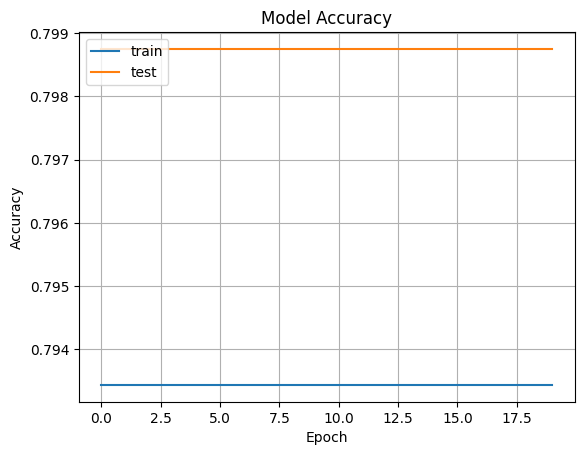

In [111]:
## summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.grid(True)
plt.show()

In [112]:
## Predictions the test data 
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1607,    0],
       [ 393,    0]], dtype=int64)

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8035

In [115]:
## get the weights
classifier.get_weights()

[array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
       dtype=float32),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=float32),
 array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, 